In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import os
import custom_model_elements
from mpl_toolkits.basemap import Basemap
from radar_reflec_cmap_clipped import cmap, norm, bounds, ticklabels
from load_data import load_data
import pickle
import cv2
import numpy as np
from skimage.feature import hog
from scipy.stats import pearsonr
import cv2
import numpy as np
from skimage.feature import hog
from scipy.stats import pearsonr

In [2]:
dataFile = '../Data/gremlin.npz'
if 'Xdata_train' not in locals():
    Xdata_train, Ydata_train, Xdata_test, Ydata_test, \
        Lat_train, Lon_train, Lat_test, Lon_test, \
        Xdata_scalar_train, Xdata_scalar_test = load_data( dataFile )
    nbatches_train,ny,nx,nchans = Xdata_train.shape
    nbatches_test,ny,nx,nchans = Xdata_test.shape

Loading data from file: ../Data/gremlin.npz
Assigning to variables:
   Xdata_train, Ydata_train
   Xdata_test, Y_data_test
   Lat/Lon



Metric

In [64]:
def grad_total_variation(image):
    # Ensure the image is a NumPy array with float data type
    image = image.astype(float)

    # Calculate the horizontal and vertical gradients using central differences
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute the total variation as the L1 norm of the gradients
    tv = np.sum(np.abs(gradient_x)) + np.sum(np.abs(gradient_y))

    return tv

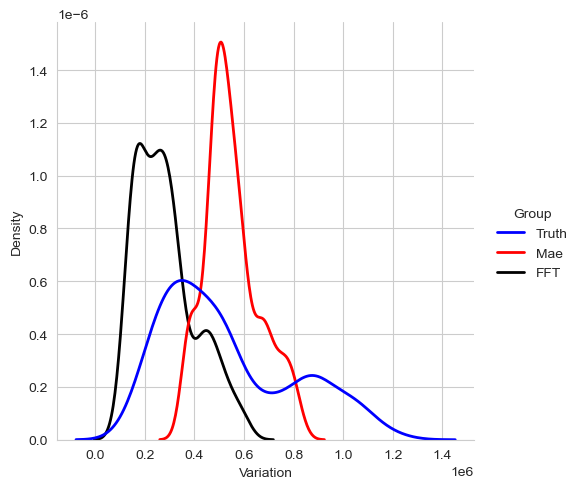

In [96]:
tv0 = []
for time in range(len(Ydata_test)):
    hv = np.sum(np.abs(Ydata_test[time,:,:-1] - Ydata_test[time,:,1:]))
    vv = np.sum(np.abs(Ydata_test[time,:-1,:] - Ydata_test[time,1:,:]))
    tv = hv + vv
    tv0.append(tv)
    
tv1 = []
for time in range(len(prediction4)):
    hv = np.sum(np.abs(prediction4[time,:,:-1] - prediction4[time,:,1:]))
    vv = np.sum(np.abs(prediction4[time,:-1,:] - prediction4[time,1:,:]))
    tv = hv + vv
    tv1.append(tv)
    
tv2 = []
for time in range(len(prediction8)):
    hv = np.sum(np.abs(prediction8[time,:,:-1] - prediction8[time,:,1:]))
    vv = np.sum(np.abs(prediction8[time,:-1,:] - prediction8[time,1:,:]))
    tv = hv + vv
    tv2.append(tv)
    
tv3 = []
for time in range(len(prediction10)):
    hv = np.sum(np.abs(prediction10[time,:,:-1] - prediction10[time,:,1:]))
    vv = np.sum(np.abs(prediction10[time,:-1,:] - prediction10[time,1:,:]))
    tv = hv + vv
    tv3.append(tv)
    
    
ad = {'Group': 'Truth', 'Variation': tv0}
df = pd.DataFrame(ad)

cd = {'Group': 'Mae', 'Variation': tv1}
df2 = pd.DataFrame(cd)

de = {'Group': 'FFT', 'Variation': tv2}
df3 = pd.DataFrame(de)

df4 = pd.concat([df, df2, df3])

Plotting

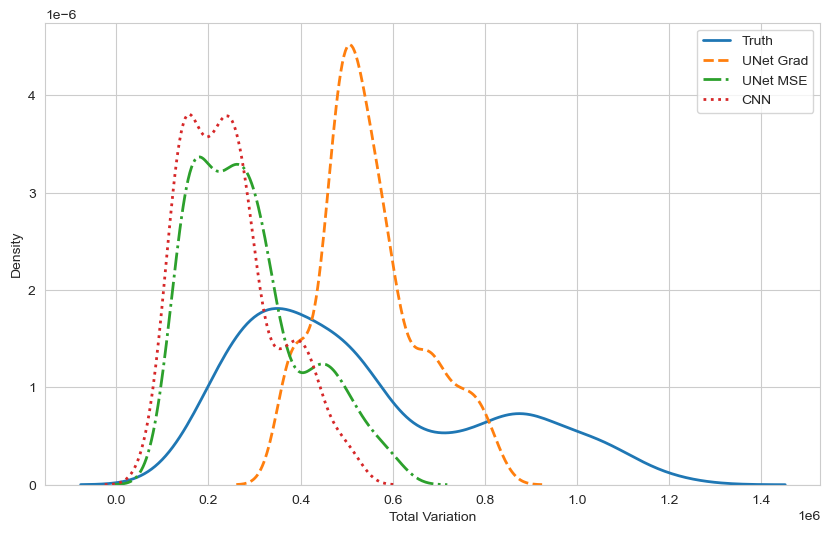

In [97]:
metrics = [tv0, tv1, tv2, tv3]
labels = ['Truth', 'UNet Grad', 'UNet MSE', 'CNN']

line_styles = ['-', '--', '-.', ':', '-', '--']

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
for i in range(len(metrics)):
    sns.kdeplot(metrics[i], label=labels[i], linestyle=line_styles[i],linewidth=2)

plt.legend()
plt.xlabel('Total Variation')
plt.ylabel('Density')
plt.show()